### DBSCAN(Density Based Spatial Clustering of Apllications with Noise)

It is an unsupervised machine learning algorithm.This algorithm defines clusters as continuous regions of high density.

Some definitions first:

**Epsilon:** This is also called eps. This is the distance till which we look for the neighbouring points.

**Min_points:** The minimum number of points specified by the user.

**Core Points:** If the number of points inside the _eps radius_ of a point is greater than or equal to the *min_points* then it’s called a core point.

**Border Points:** If the number of points inside the _eps radius_ of a point is less than the *min_points* and it lies within the _eps radius_ region of a core point, it’s called a border point.

**Noise:** A point which is neither a core nor a border point is a noise point.


Let’s say if the eps=1 and min_points =4

<img src="point_def.PNG" width="400">




Algorithm Steps:

1.	The algorithm starts with a random point in the dataset which has not been visited yet and its neighbouring points are identified based on the eps value.
2.	If the point contains greater than or equal points than the min_pts, then the cluster formation starts and this point becomes a _core point_, else it’s considered as noise. The thing to note here is that a point initially classified as noise can later become a border point if it’s in the eps radius of a core point.
3.	If the point is a core point, then all its neighbours become a part of the cluster. If the points in the neighbourhood turn out to be core points then their neighbours are also part of the cluster.
4.	Repeat the steps above until all points are  classified into different clusters or noises.



This algorithm works well if all the clusters are dense enough, and they are well separated by low-density regions.

In [1]:
# Necessary Imports

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Data creation
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

In [3]:
# DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# we are calculating these for showcasing in diagram
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

In [4]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [5]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


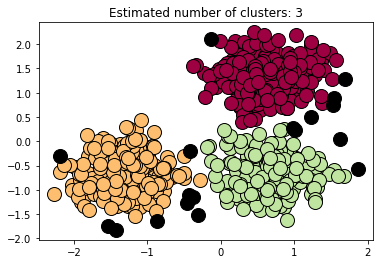

In [6]:
# Plot result
import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In short, DBSCAN is a very simple yet powerful algorithm, capable of identifying any number of clusters, of any shape, it is robust to outliers, and it has just two hyper parameters(eps and min_samples). However, if the density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly. Moreover, its computational complexity is roughly O(m log m), making it pretty close to linear with regards to the number of instances.

## Evaluation Criteria

**Cluster Validity**

The validation of clusters created is a troublesome task. 
The problem here is: ”clusters are in the eyes of the beholder”

_A good cluster will have:_
* High inter-class similarity, and 
* Low intraclass similarity


##### Aspects of cluster validation

* **External:** Compare your cluster to the ground truth.
* **Internal:** Evaluating the cluster without reference to external data.
* **Reliability:** The clusters are not formed by chance(randomly)- some statistical framework can be used.


##### External Measures:

N: Number of objects in the data
P: ${P_1,P_2,…,P_m}$ the set of ground truth clusters
C: ${C_1,C_2,…C_n}$ the set of clusters formed by the algorithm

The Incidence Matrix:
N* N matrix

$P_ij =1$ if the two points $O_i$ and $O_j$ belong to the same cluster in the ground truth else $P_ij=0$ 

$C_ij =1$ if the two points $O_i$ and $O_j$ belong to the same cluster in the ground truth else $C_ij=0$ 

Now there can be the following scenarios:
1.	$C_ij=P_ij=1$ --> both the points belong to the same cluster for both our algorithm and ground truth(Agree)--- **SS**
2.	$C_ij=P_ij=0$ --> both the points don’t belong to the same cluster for both our algorithm and ground truth(Agree)--- **DD**
3.	$_Cij=1 but P_ij=0$ --> The points belong in the same cluster for our algorithm but in different clusters for the ground truth (Disagree)---- **SD**
4.	$C_ij=0 but P_ij=1$ --> The points don’t belong in the same cluster for our algorithm but in same clusters for the ground truth (Disagree)----**DS**

**Rand Index**= $\frac{Total Agree}{Total Disagree}=\frac{(SS+DD)}{(SS+DD+DS+SD)}$

The disadvantage of this is that it could be dominated by DD.

**Jaccard Coeeficient**=$\frac{ SS}{(SS+SD+DS)}$


In [13]:
#Note amax return maximum elements among each raws when axis = 0 and maximum element among each columsn when axis = 1
np.amax(np.array([[4,2,3] , [1,5,6]]) , axis = 0)  
# whwen axis = 0 meanas gives array equal to no of columns
# when axis = 1 means gives array equal to no of raws

array([4, 5, 6])

#### Internal Measures

These are the methods use to measure the quality of clusters without external references. There are two aspects to it.

* **Cohesion:** How closely the objects in the same cluster are related to each other. It is the within-cluster sum of squared distances. It is the same metric that we used to calculate for the K-Means algorithm.
$WCSS= \sum \sum (x-m_i)^2$

* **Separation:** How different the objects in different clusters are and how distinct a well-separated cluster is from other clusters. It is the between cluster sum of squared distances. $BSS=\sum C_i(m-m_i)^2$

Where C is the size of the individual cluster and m is the centroid of all the data points.

**Note:** BSS+WSS is always a constant.

The silhouette  can be calculated as:
<img src="sil2.PNG" width= "300">

Where a(x) is the avarage distance of x from all the other points in the same cluster and b(x) is the avarage distance of x from all the other points in the other clusters.


And the Silhoeutte coefficient is given by:

$SC=\frac{1}{N} \sum S(x)$


In [31]:
from scipy.spatial.distance import cdist
ds = cdist(X,X)
len(ds)

750

In [32]:
metrics.silhouette_score(X , labels)

0.6255247640253795

In [33]:
from scipy.cluster.hierarchy import *

lm = linkage(ds,metric='euclidean')


<ipython-input-33-0fda3a17b46d>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,metric='euclidean')


In [34]:
len(lm)

749

In [35]:
len(labels)

750